1.A $5\times 5$ matrix

In [12]:
import numpy as np
A = np.eye(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


2.CEO of a restaurant 

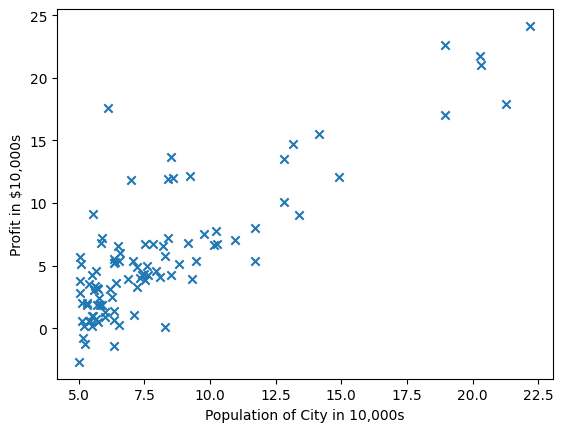

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("../homeworks/ex1-linear regression/ex1data1.txt",header=None)
# header==None,表示没有表头,不然会默认把第一行当表头
X = data.iloc[:,0]
Y = data.iloc[:,1]
m = len(X)

# 绘图
plt.scatter(X,Y,marker='x') # marker是点形状
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


3. 线性回归(梯度下降)

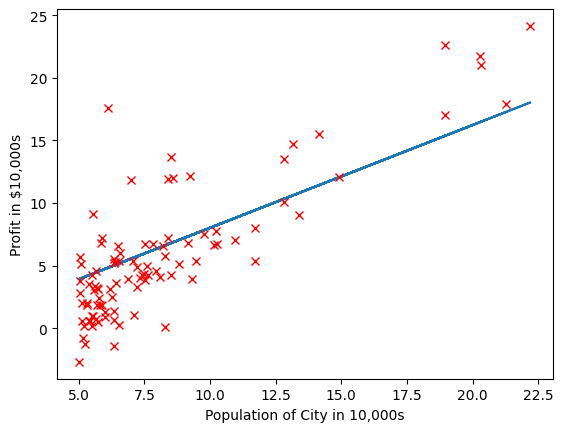

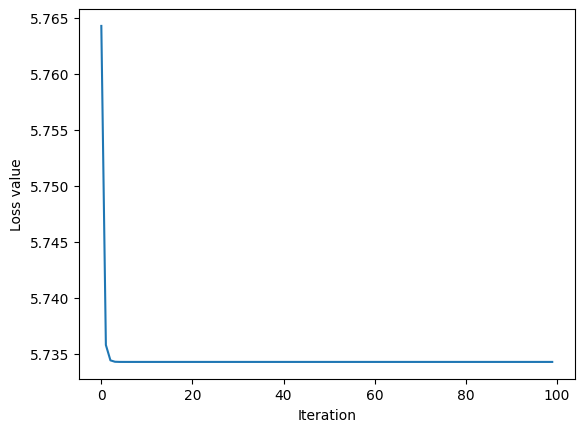

In [26]:
# h(x)
def h(x, theta0, theta1):
    return theta0 + theta1 * x
# loss function
def loss(X,Y,theta0,theta1):
    m = len(X)
    return 1/(2*m)*np.sum((h(X,theta0,theta1)-Y)**2)
# update theta
def theta_update(X,Y,theta0,theta1,alpha):
    m = len(X)
    result = np.zeros(2)
    df = np.sum((h(X,theta0,theta1)-Y)*X) / m
    result[0] = theta0 - alpha * df
    result[1] = theta1 - alpha * df
    return result
# 主循环
def main(X,Y,alpha,theta0,theta1,iter):
    loss_list = np.empty(iter)
    for i in range(iter):
        theta0,theta1 = theta_update(X,Y,theta0,theta1,alpha)
        loss_list[i] = loss(X,Y,theta0,theta1)
    return theta0,theta1,loss_list

theta0,theta1,loss_list= main(X,Y,0.01,0,1,100)
plt.figure()
plt.plot(X,h(X,theta0,theta1))
plt.plot(X,Y,'rx')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

plt.figure()
plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show()

4.plot $J(\theta0,\theta1)$

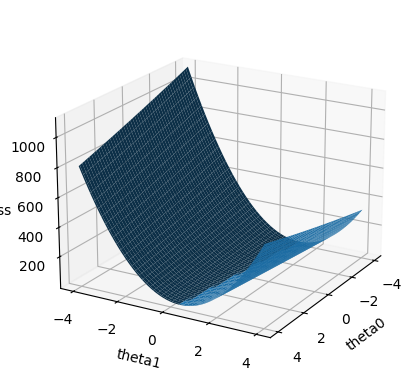

In [47]:
# 重写loss 函数,因为之前用了 np 的便捷运算,如果继续用python 会把 X,theta 都当成向量
def loss(X,Y,theta0,theta1):
    m = len(X)
    return 1/(2*m)*sum([(h(X[i],theta0,theta1)-Y[i])**2 for i in range(m)])
theta0 = np.linspace(-4,4,100)
theta1 = np.linspace(-4,4,100)
theta0, theta1 = np.meshgrid(theta0, theta1)

loss_pic = plt.figure()
loss_ax = loss_pic.add_subplot(111,projection='3d')
loss_ax.view_init(elev=20, azim=30) 
loss_ax.plot_surface(theta0,theta1,loss(X,Y,theta0,theta1))
loss_ax.set_xlabel("theta0")
loss_ax.set_ylabel("theta1")
loss_ax.set_zlabel("Loss")
plt.show()